In [1]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
permutations = pd.read_csv('data/full_10k_permutation.csv')

In [3]:
pval = pd.read_csv('data/p_val.csv')
pval = pval[pval.Cancer != 'gbm']

In [4]:
cor_diff = pd.read_csv('data/corr_diff.csv')
cor_diff = cor_diff[cor_diff.Cancer != 'gbm']

In [5]:
cor_diff = cor_diff.melt(id_vars = ['Cancer'], var_name = 'gene', value_name= 'cor_diff' )
pval = pval.melt(id_vars = ['Cancer'], var_name = 'gene', value_name= 'transformed_pval' )
permutations = permutations.melt(id_vars = ['Cancer'], var_name = 'gene', value_name= 'permutation_pval' )

In [6]:
both_pvals = pd.merge(permutations, pval)
both_pvals = both_pvals.dropna()
r, p = stats.pearsonr(both_pvals.permutation_pval, both_pvals.transformed_pval)


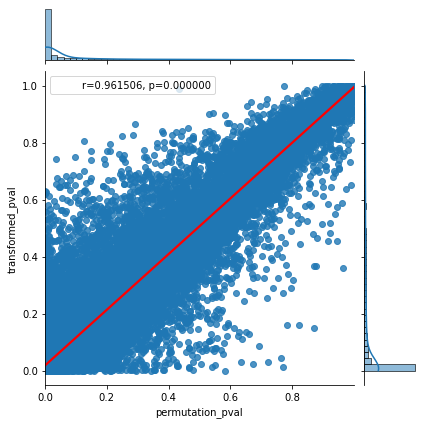

In [7]:
g = sns.jointplot(x='permutation_pval', y = 'transformed_pval', data = both_pvals, kind = 'reg',
                 joint_kws={'line_kws':{'color':'red'}})
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.savefig('Figures/Figure 9 p-val comparison.png')
plt.show()

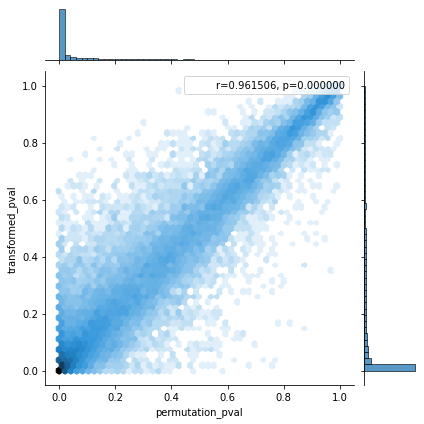

In [8]:
g = sns.jointplot(x = 'permutation_pval', y = 'transformed_pval', data = both_pvals, kind = 'hex', bins = 'log')
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

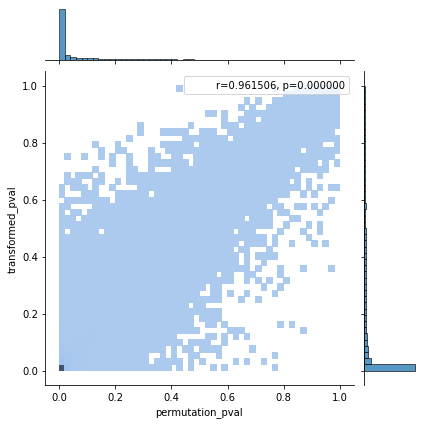

In [9]:
g = sns.jointplot(x = 'permutation_pval', y = 'transformed_pval', data = both_pvals, kind = 'hist')
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])